# Playing with the data :)

In [9]:
!pip install scipy.io
!pip install scipy
!pip install matplotlib


ERROR: Could not find a version that satisfies the requirement scipy.io (from versions: none)
ERROR: No matching distribution found for scipy.io


In [10]:
!pip install numpy

In [12]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
data = loadmat('Xtrain.mat')
Xtrain = data['Xtrain']



In [13]:
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Xtrain'])

In [14]:
import numpy as np
def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr
Xtrain = normalize_array(Xtrain)
Xtrain = Xtrain.ravel()
print(Xtrain)


[0.33201581 0.54940711 0.36758893 0.1541502  0.07905138 0.07509881
 0.11857708 0.27667984 0.53754941 0.43083004 0.18181818 0.08300395
 0.06719368 0.09881423 0.22529644 0.50197628 0.50197628 0.22134387
 0.09881423 0.06719368 0.08695652 0.17391304 0.43478261 0.56126482
 0.28063241 0.11067194 0.07114625 0.06719368 0.13833992 0.35573123
 0.59288538 0.35968379 0.13438735 0.07114625 0.06324111 0.10671937
 0.27272727 0.56916996 0.45454545 0.17391304 0.08300395 0.06324111
 0.07905138 0.19762846 0.49802372 0.55335968 0.23715415 0.09486166
 0.05928854 0.06719368 0.13833992 0.38735178 0.61660079 0.33201581
 0.11857708 0.05928854 0.05928854 0.09881423 0.27667984 0.60079051
 0.45849802 0.16205534 0.07114625 0.0513834  0.07509881 0.17786561
 0.49802372 0.58498024 0.24110672 0.08695652 0.05533597 0.05928854
 0.12252964 0.35573123 0.64822134 0.36758893 0.12252964 0.05533597
 0.04743083 0.07905138 0.22134387 0.58102767 0.53359684 0.18972332
 0.07114625 0.0513834  0.05533597 0.13043478 0.41106719 0.6600

In [15]:
print(np.mean(Xtrain, axis=0))  # Mean of each column (if it's a 2D matrix)
print(np.std(Xtrain, axis=0))   # Standard deviation of each column


0.22883003952569173
0.1851857226641462


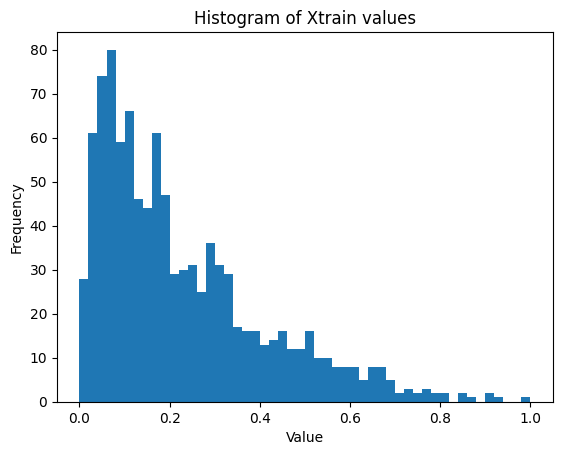

In [16]:
plt.hist(Xtrain.flatten(), bins=50)
plt.title("Histogram of Xtrain values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [17]:
mean_value = np.mean(Xtrain)
std_dev = np.std(Xtrain)
min_value = np.min(Xtrain)
max_value = np.max(Xtrain)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: 0.22883003952569173
Standard Deviation: 0.1851857226641462
Min Value: 0.0
Max Value: 1.0


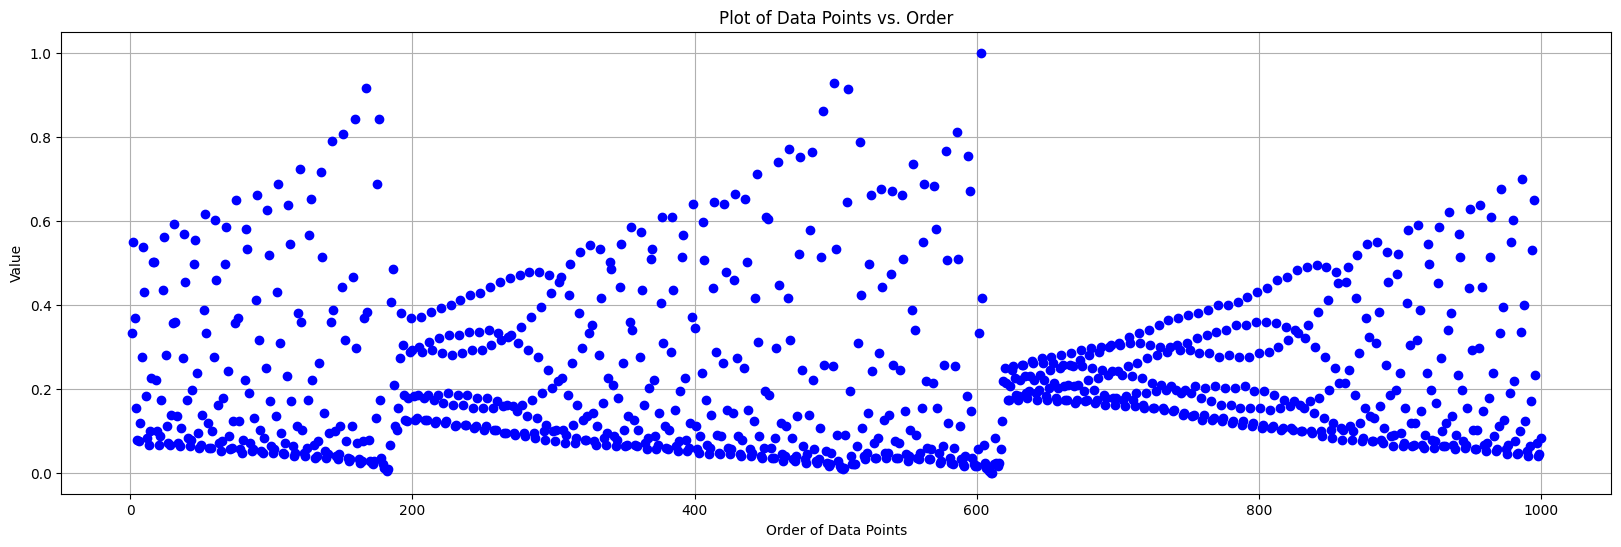

In [18]:

x_values = np.arange(1, len(Xtrain) + 1)


plt.figure(figsize=(20, 6))
plt.plot(x_values, Xtrain, marker='o', color='b', linestyle='None', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


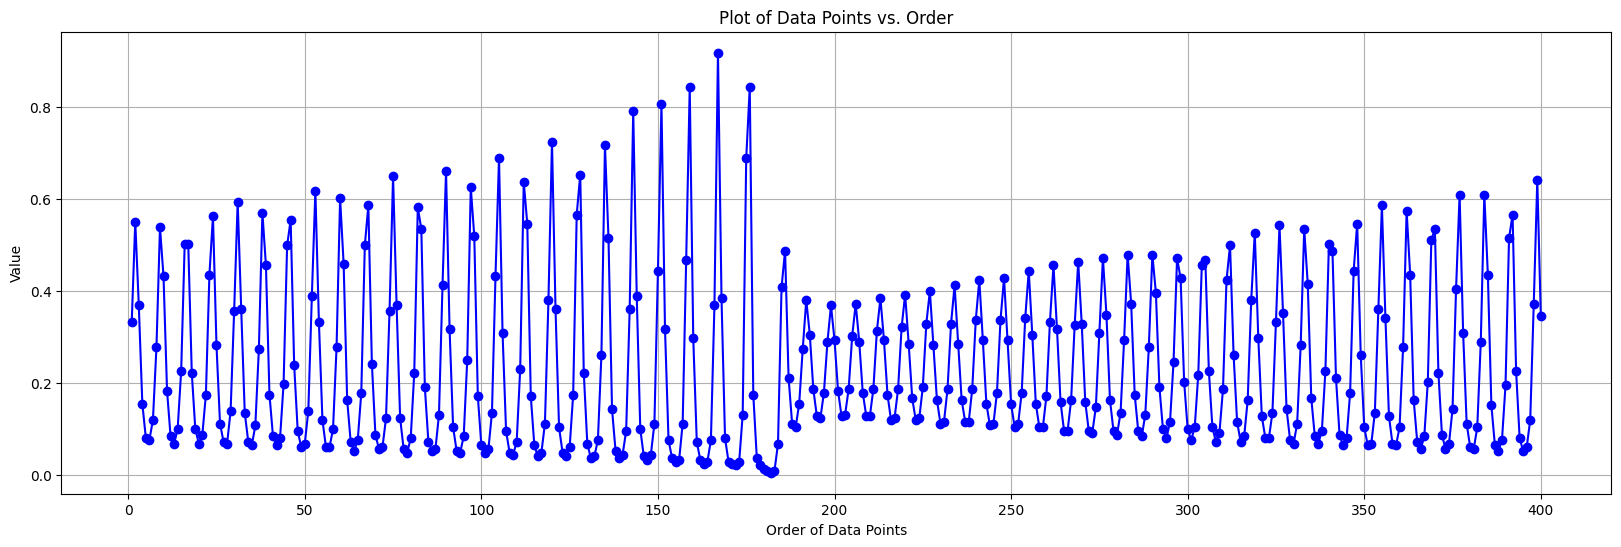

In [19]:

x_values = np.arange(1, len(Xtrain) + 1)
x_subset = x_values[:400]
y_subset = Xtrain[:400]

plt.figure(figsize=(20, 6))
plt.plot(x_subset, y_subset, marker='o', color='b', linestyle='-', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


In [20]:
!pip install tensorflow

In [21]:
import tensorflow as tf


In [22]:
print(Xtrain.shape)


(1000,)


In [23]:
window = 10

X_window = []
y_window = []

for i in range(len(Xtrain) - window):
    X_window.append(Xtrain[i:i+window])
    y_window.append(Xtrain[i+window])

X_win = np.array(X_window)
y_win = np.array(y_window)

X_win = X_win.reshape((X_win.shape[0], window, 1))
y_win = y_win.reshape((-1, 1))


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#dense - every input neuron is connected to every output neuron.
#simpleRNNN - every input neuron is connected to every output neuron.


model = Sequential([
    SimpleRNN(32, input_shape=(window, 1)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_win, y_win, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0665 - mae: 0.1873 - mse: 0.0665 - val_loss: 0.0067 - val_mae: 0.0724 - val_mse: 0.0067
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0090 - mae: 0.0627 - mse: 0.0090 - val_loss: 0.0042 - val_mae: 0.0491 - val_mse: 0.0042
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0079 - mae: 0.0543 - mse: 0.0079 - val_loss: 0.0039 - val_mae: 0.0488 - val_mse: 0.0039
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0084 - mae: 0.0525 - mse: 0.0084 - val_loss: 0.0026 - val_mae: 0.0399 - val_mse: 0.0026
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - mae: 0.0488 - mse: 0.0068 - val_loss: 0.0035 - val_mae: 0.0439 - val_mse: 0.0035
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0528 - mse: 0.0084 - val_loss: 0.0025 - val_mae: 0.0385 - val_mse: 0.0025
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mae: 0.0521 - mse: 0.0074 - val_loss: 0.

In [26]:
loss, mae, mse = model.evaluate(X_win, y_win)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0495 - mse: 0.0058
MAE: 0.0480, MSE: 0.0057


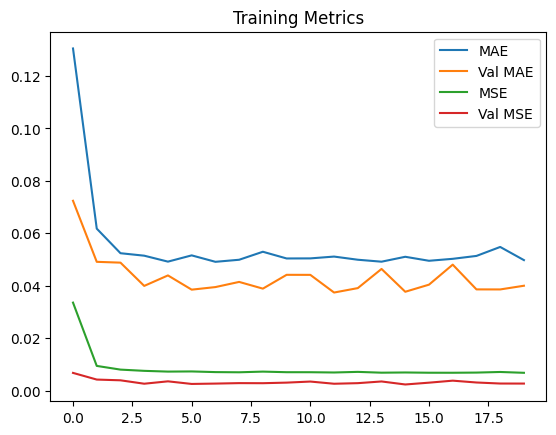

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.plot(history.history['mse'], label='MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.legend()
plt.title("Training Metrics")
plt.show()


# Function for diff params

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [39]:
def build_lstm_model(
    input_shape,              # (lookback, 1)
    num_layers=1,             # Number of LSTM layers
    units_per_layer=64,       # Units in each LSTM layer
    dropout_rate=0.2
):
    model = Sequential()

    for i in range(num_layers):
        return_sequences = (i < num_layers - 1)

        if i == 0:
            model.add(LSTM(units_per_layer, return_sequences=return_sequences, input_shape=input_shape))
        else:
            model.add(LSTM(units_per_layer, return_sequences=return_sequences))

        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    return model


#Splitting the data


In [29]:
def prepare_data_simple(Xtrain, lookback):
    Xtrain = Xtrain.flatten()

    # 80% split
    split_idx = int(len(Xtrain) * 0.8)
    train_data = Xtrain[:split_idx]
    val_data = Xtrain[split_idx - lookback:]

    def create(X):
        Xs, ys = [], []
        for i in range(lookback, len(X)):
            Xs.append(X[i - lookback:i])
            ys.append(X[i])
        return np.array(Xs), np.array(ys)

    X_train, y_train = create(train_data)
    X_val, y_val = create(val_data)

    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]

    return X_train, y_train, X_val, y_val


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 0.0485 - val_loss: 0.0317
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0393 - val_loss: 0.0316
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0344 - val_loss: 0.0307
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0327 - val_loss: 0.0295
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0356 - val_loss: 0.0270
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0344 - val_loss: 0.0238
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0276 - val_loss: 0.0194
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0324 - val_loss: 0.0170
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0302 - val_loss: 0.0151
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0323 - val_loss: 0.0230
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0290 - val_loss: 0.0211
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.

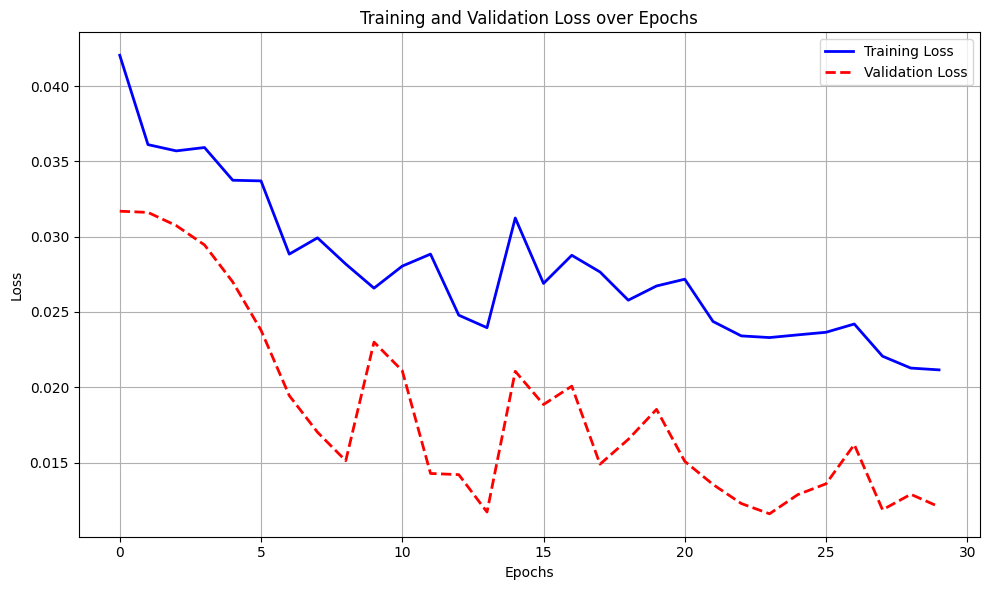

In [48]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=20)

model = build_lstm_model(input_shape=(X_train.shape[1], 1), num_layers=5, units_per_layer=64, dropout_rate=0.2)

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


# COMPARISON- lstm - vanilla rnn - linear regression

In [63]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=10)


In [64]:
lstm_model = build_lstm_model(
    input_shape=(X_train.shape[1], 1),
    num_layers=1,
    units_per_layer=64,
    dropout_rate=0.2
)
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
lstm_pred = lstm_model.predict(X_val)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step


In [65]:
def build_rnn_model(input_shape, units=64):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn_model(input_shape=(X_train.shape[1], 1))
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
rnn_pred = rnn_model.predict(X_val)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [66]:
from sklearn.linear_model import LinearRegression

X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_val_lr = X_val.reshape(X_val.shape[0], -1)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
lr_pred = lr_model.predict(X_val_lr)


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}")

evaluate_model("LSTM", y_val, lstm_pred)
evaluate_model("Vanilla RNN", y_val, rnn_pred)
evaluate_model("Linear Regression", y_val, lr_pred)


LSTM - MSE: 0.0048, MAE: 0.0541
Vanilla RNN - MSE: 0.0036, MAE: 0.0491
Linear Regression - MSE: 0.0031, MAE: 0.0413
